In [12]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt


In [13]:
img = cv2.imread(r"C:\Users\princ\OneDrive\Desktop\Coding scripts\ML programs\image_classifier\dataset\Vamshi\IMG20211015165808.jpg")
print(img.shape)
image_path=""

(2048, 1536, 3)


In [14]:
face_cascade = cv2.CascadeClassifier(r"C:\Users\princ\OneDrive\Desktop\Coding scripts\ML programs\image_classifier\opencv\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"C:\Users\princ\OneDrive\Desktop\Coding scripts\ML programs\image_classifier\opencv\haarcascade_eye.xml")

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color



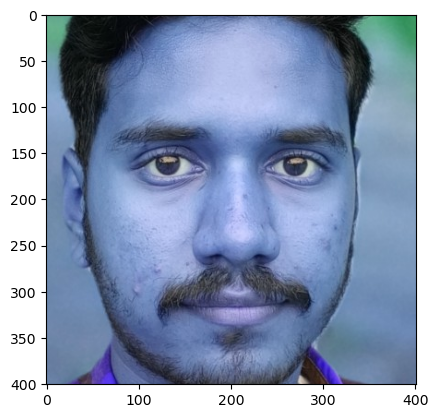

In [15]:
cropped_image = get_cropped_image_if_2_eyes(r"C:\Users\princ\OneDrive\Desktop\Coding scripts\ML programs\image_classifier\dataset\Vamshi\IMG20220709092941.jpg")
plt.imshow(cropped_image)

In [16]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [17]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

img_dirs

['./dataset/Arthisha',
 './dataset/jayanth',
 './dataset/satya',
 './dataset/Vamshi']

In [18]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [19]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

Arthisha
Generating cropped images in folder:  ./dataset/cropped/Arthisha
jayanth
Generating cropped images in folder:  ./dataset/cropped/jayanth
satya
Generating cropped images in folder:  ./dataset/cropped/satya
Vamshi
Generating cropped images in folder:  ./dataset/cropped/Vamshi


In [21]:
# Wavelet transform
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [22]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

NameError: name 'cropped_img' is not defined

In [23]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Arthisha': ['./dataset/cropped/Arthisha\\Arthisha1.png',
  './dataset/cropped/Arthisha\\Arthisha10.png',
  './dataset/cropped/Arthisha\\Arthisha11.png',
  './dataset/cropped/Arthisha\\Arthisha12.png',
  './dataset/cropped/Arthisha\\Arthisha13.png',
  './dataset/cropped/Arthisha\\Arthisha14.png',
  './dataset/cropped/Arthisha\\Arthisha2.png',
  './dataset/cropped/Arthisha\\Arthisha3.png',
  './dataset/cropped/Arthisha\\Arthisha4.png',
  './dataset/cropped/Arthisha\\Arthisha5.png',
  './dataset/cropped/Arthisha\\Arthisha6.png',
  './dataset/cropped/Arthisha\\Arthisha7.png',
  './dataset/cropped/Arthisha\\Arthisha8.png',
  './dataset/cropped/Arthisha\\Arthisha9.png'],
 'jayanth': ['./dataset/cropped/jayanth\\jayanth1.png',
  './dataset/cropped/jayanth\\jayanth10.png',
  './dataset/cropped/jayanth\\jayanth11.png',
  './dataset/cropped/jayanth\\jayanth12.png',
  './dataset/cropped/jayanth\\jayanth14.png',
  './dataset/cropped/jayanth\\jayanth16.png',
  './dataset/cropped/jayanth\\jayanth1

In [24]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Arthisha': 0, 'jayanth': 1, 'satya': 2, 'Vamshi': 3}

In [25]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   
        print(X)

[array([[188],
       [194],
       [199],
       ...,
       [  0],
       [  0],
       [255]], dtype=uint8)]
[array([[188],
       [194],
       [199],
       ...,
       [  0],
       [  0],
       [255]], dtype=uint8), array([[41],
       [62],
       [69],
       ...,
       [ 0],
       [ 0],
       [63]], dtype=uint8)]
[array([[188],
       [194],
       [199],
       ...,
       [  0],
       [  0],
       [255]], dtype=uint8), array([[41],
       [62],
       [69],
       ...,
       [ 0],
       [ 0],
       [63]], dtype=uint8), array([[102],
       [122],
       [155],
       ...,
       [230],
       [ 91],
       [ 20]], dtype=uint8)]
[array([[188],
       [194],
       [199],
       ...,
       [  0],
       [  0],
       [255]], dtype=uint8), array([[41],
       [62],
       [69],
       ...,
       [ 0],
       [ 0],
       [63]], dtype=uint8), array([[102],
       [122],
       [155],
       ...,
       [230],
       [ 91],
       [ 20]], dtype=uint8), array([[254],
 

[array([[188],
       [194],
       [199],
       ...,
       [  0],
       [  0],
       [255]], dtype=uint8), array([[41],
       [62],
       [69],
       ...,
       [ 0],
       [ 0],
       [63]], dtype=uint8), array([[102],
       [122],
       [155],
       ...,
       [230],
       [ 91],
       [ 20]], dtype=uint8), array([[254],
       [254],
       [254],
       ...,
       [  3],
       [  3],
       [  2]], dtype=uint8), array([[ 64],
       [ 52],
       [ 50],
       ...,
       [199],
       [  0],
       [181]], dtype=uint8), array([[ 79],
       [ 97],
       [113],
       ...,
       [172],
       [179],
       [228]], dtype=uint8), array([[ 49],
       [ 60],
       [128],
       ...,
       [ 54],
       [  3],
       [183]], dtype=uint8), array([[55],
       [53],
       [59],
       ...,
       [ 1],
       [ 0],
       [ 3]], dtype=uint8), array([[146],
       [155],
       [152],
       ...,
       [  3],
       [  0],
       [  1]], dtype=uint8), array([[193]

[array([[188],
       [194],
       [199],
       ...,
       [  0],
       [  0],
       [255]], dtype=uint8), array([[41],
       [62],
       [69],
       ...,
       [ 0],
       [ 0],
       [63]], dtype=uint8), array([[102],
       [122],
       [155],
       ...,
       [230],
       [ 91],
       [ 20]], dtype=uint8), array([[254],
       [254],
       [254],
       ...,
       [  3],
       [  3],
       [  2]], dtype=uint8), array([[ 64],
       [ 52],
       [ 50],
       ...,
       [199],
       [  0],
       [181]], dtype=uint8), array([[ 79],
       [ 97],
       [113],
       ...,
       [172],
       [179],
       [228]], dtype=uint8), array([[ 49],
       [ 60],
       [128],
       ...,
       [ 54],
       [  3],
       [183]], dtype=uint8), array([[55],
       [53],
       [59],
       ...,
       [ 1],
       [ 0],
       [ 3]], dtype=uint8), array([[146],
       [155],
       [152],
       ...,
       [  3],
       [  0],
       [  1]], dtype=uint8), array([[193]

[array([[188],
       [194],
       [199],
       ...,
       [  0],
       [  0],
       [255]], dtype=uint8), array([[41],
       [62],
       [69],
       ...,
       [ 0],
       [ 0],
       [63]], dtype=uint8), array([[102],
       [122],
       [155],
       ...,
       [230],
       [ 91],
       [ 20]], dtype=uint8), array([[254],
       [254],
       [254],
       ...,
       [  3],
       [  3],
       [  2]], dtype=uint8), array([[ 64],
       [ 52],
       [ 50],
       ...,
       [199],
       [  0],
       [181]], dtype=uint8), array([[ 79],
       [ 97],
       [113],
       ...,
       [172],
       [179],
       [228]], dtype=uint8), array([[ 49],
       [ 60],
       [128],
       ...,
       [ 54],
       [  3],
       [183]], dtype=uint8), array([[55],
       [53],
       [59],
       ...,
       [ 1],
       [ 0],
       [ 3]], dtype=uint8), array([[146],
       [155],
       [152],
       ...,
       [  3],
       [  0],
       [  1]], dtype=uint8), array([[193]

[array([[188],
       [194],
       [199],
       ...,
       [  0],
       [  0],
       [255]], dtype=uint8), array([[41],
       [62],
       [69],
       ...,
       [ 0],
       [ 0],
       [63]], dtype=uint8), array([[102],
       [122],
       [155],
       ...,
       [230],
       [ 91],
       [ 20]], dtype=uint8), array([[254],
       [254],
       [254],
       ...,
       [  3],
       [  3],
       [  2]], dtype=uint8), array([[ 64],
       [ 52],
       [ 50],
       ...,
       [199],
       [  0],
       [181]], dtype=uint8), array([[ 79],
       [ 97],
       [113],
       ...,
       [172],
       [179],
       [228]], dtype=uint8), array([[ 49],
       [ 60],
       [128],
       ...,
       [ 54],
       [  3],
       [183]], dtype=uint8), array([[55],
       [53],
       [59],
       ...,
       [ 1],
       [ 0],
       [ 3]], dtype=uint8), array([[146],
       [155],
       [152],
       ...,
       [  3],
       [  0],
       [  1]], dtype=uint8), array([[193]

[array([[188],
       [194],
       [199],
       ...,
       [  0],
       [  0],
       [255]], dtype=uint8), array([[41],
       [62],
       [69],
       ...,
       [ 0],
       [ 0],
       [63]], dtype=uint8), array([[102],
       [122],
       [155],
       ...,
       [230],
       [ 91],
       [ 20]], dtype=uint8), array([[254],
       [254],
       [254],
       ...,
       [  3],
       [  3],
       [  2]], dtype=uint8), array([[ 64],
       [ 52],
       [ 50],
       ...,
       [199],
       [  0],
       [181]], dtype=uint8), array([[ 79],
       [ 97],
       [113],
       ...,
       [172],
       [179],
       [228]], dtype=uint8), array([[ 49],
       [ 60],
       [128],
       ...,
       [ 54],
       [  3],
       [183]], dtype=uint8), array([[55],
       [53],
       [59],
       ...,
       [ 1],
       [ 0],
       [ 3]], dtype=uint8), array([[146],
       [155],
       [152],
       ...,
       [  3],
       [  0],
       [  1]], dtype=uint8), array([[193]

[array([[188],
       [194],
       [199],
       ...,
       [  0],
       [  0],
       [255]], dtype=uint8), array([[41],
       [62],
       [69],
       ...,
       [ 0],
       [ 0],
       [63]], dtype=uint8), array([[102],
       [122],
       [155],
       ...,
       [230],
       [ 91],
       [ 20]], dtype=uint8), array([[254],
       [254],
       [254],
       ...,
       [  3],
       [  3],
       [  2]], dtype=uint8), array([[ 64],
       [ 52],
       [ 50],
       ...,
       [199],
       [  0],
       [181]], dtype=uint8), array([[ 79],
       [ 97],
       [113],
       ...,
       [172],
       [179],
       [228]], dtype=uint8), array([[ 49],
       [ 60],
       [128],
       ...,
       [ 54],
       [  3],
       [183]], dtype=uint8), array([[55],
       [53],
       [59],
       ...,
       [ 1],
       [ 0],
       [ 3]], dtype=uint8), array([[146],
       [155],
       [152],
       ...,
       [  3],
       [  0],
       [  1]], dtype=uint8), array([[193]

[array([[188],
       [194],
       [199],
       ...,
       [  0],
       [  0],
       [255]], dtype=uint8), array([[41],
       [62],
       [69],
       ...,
       [ 0],
       [ 0],
       [63]], dtype=uint8), array([[102],
       [122],
       [155],
       ...,
       [230],
       [ 91],
       [ 20]], dtype=uint8), array([[254],
       [254],
       [254],
       ...,
       [  3],
       [  3],
       [  2]], dtype=uint8), array([[ 64],
       [ 52],
       [ 50],
       ...,
       [199],
       [  0],
       [181]], dtype=uint8), array([[ 79],
       [ 97],
       [113],
       ...,
       [172],
       [179],
       [228]], dtype=uint8), array([[ 49],
       [ 60],
       [128],
       ...,
       [ 54],
       [  3],
       [183]], dtype=uint8), array([[55],
       [53],
       [59],
       ...,
       [ 1],
       [ 0],
       [ 3]], dtype=uint8), array([[146],
       [155],
       [152],
       ...,
       [  3],
       [  0],
       [  1]], dtype=uint8), array([[193]

[array([[188],
       [194],
       [199],
       ...,
       [  0],
       [  0],
       [255]], dtype=uint8), array([[41],
       [62],
       [69],
       ...,
       [ 0],
       [ 0],
       [63]], dtype=uint8), array([[102],
       [122],
       [155],
       ...,
       [230],
       [ 91],
       [ 20]], dtype=uint8), array([[254],
       [254],
       [254],
       ...,
       [  3],
       [  3],
       [  2]], dtype=uint8), array([[ 64],
       [ 52],
       [ 50],
       ...,
       [199],
       [  0],
       [181]], dtype=uint8), array([[ 79],
       [ 97],
       [113],
       ...,
       [172],
       [179],
       [228]], dtype=uint8), array([[ 49],
       [ 60],
       [128],
       ...,
       [ 54],
       [  3],
       [183]], dtype=uint8), array([[55],
       [53],
       [59],
       ...,
       [ 1],
       [ 0],
       [ 3]], dtype=uint8), array([[146],
       [155],
       [152],
       ...,
       [  3],
       [  0],
       [  1]], dtype=uint8), array([[193]

[array([[188],
       [194],
       [199],
       ...,
       [  0],
       [  0],
       [255]], dtype=uint8), array([[41],
       [62],
       [69],
       ...,
       [ 0],
       [ 0],
       [63]], dtype=uint8), array([[102],
       [122],
       [155],
       ...,
       [230],
       [ 91],
       [ 20]], dtype=uint8), array([[254],
       [254],
       [254],
       ...,
       [  3],
       [  3],
       [  2]], dtype=uint8), array([[ 64],
       [ 52],
       [ 50],
       ...,
       [199],
       [  0],
       [181]], dtype=uint8), array([[ 79],
       [ 97],
       [113],
       ...,
       [172],
       [179],
       [228]], dtype=uint8), array([[ 49],
       [ 60],
       [128],
       ...,
       [ 54],
       [  3],
       [183]], dtype=uint8), array([[55],
       [53],
       [59],
       ...,
       [ 1],
       [ 0],
       [ 3]], dtype=uint8), array([[146],
       [155],
       [152],
       ...,
       [  3],
       [  0],
       [  1]], dtype=uint8), array([[193]

In [26]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(64, 4096)

In [27]:
#Training the model
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [28]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.75

In [29]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [30]:


model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}



In [31]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.662222,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.644444,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.748889,{'logisticregression__C': 1}


In [32]:
best_estimators['svm'].score(X_test,y_test)

0.875

In [33]:
best_estimators['random_forest'].score(X_test,y_test)

0.75

In [34]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.875

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Create an instance of the LogisticRegression class
clf = LogisticRegression(solver='liblinear')

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
score = clf.score(X_test, y_test)
print("Accuracy: ", score)

Accuracy:  0.9230769230769231


Text(95.72222222222221, 0.5, 'Truth')

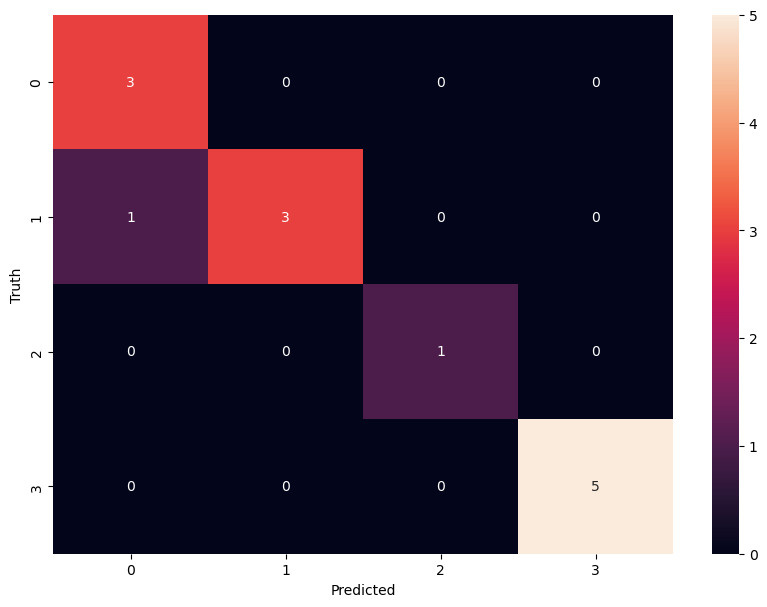

In [36]:
best_clf = best_estimators['logistic_regression']
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [48]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(clf, 'saved_Lmodel.pkl')

Defaulting to user installation because normal site-packages is not writeable


['saved_Lmodel.pkl']

In [38]:
#save the dictionary
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

Enter File Path:"C:\Users\princ\OneDrive\Desktop\Coding scripts\ML programs\image_classifier\test_dataset\vamshi.jpg"
AxesImage(80,52.8;496x369.6)
AxesImage(80,52.8;496x369.6)
The photo is of the person Vamshi


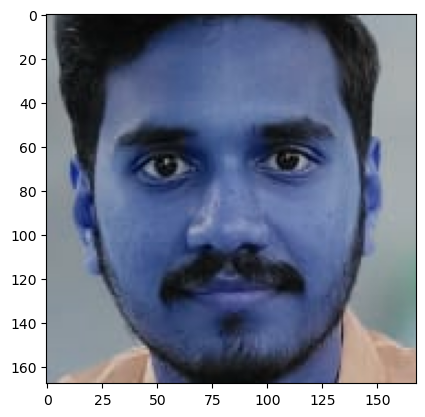

In [1]:
import numpy as np
import cv2
import numpy as np
import pywt
import joblib
from matplotlib import pyplot as plt

face_cascade = cv2.CascadeClassifier(r"C:\Users\princ\OneDrive\Desktop\Coding scripts\ML programs\image_classifier\opencv\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"C:\Users\princ\OneDrive\Desktop\Coding scripts\ML programs\image_classifier\opencv\haarcascade_eye.xml")

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

     

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

def conversion():
 image_path=input("Enter File Path:").replace('"', '')
 cropped_image=""
 cropped_image = get_cropped_image_if_2_eyes(image_path)
 print(plt.imshow(cropped_image))
 im_har = w2d(cropped_image,'db1',5)
 plt.imshow(im_har, cmap='gray')
 scalled_raw_img = cv2.resize(cropped_image, (32, 32))
 img_har = w2d(cropped_image,'db1',5)
 scalled_img_har = cv2.resize(img_har, (32, 32))
 combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
 print(plt.imshow(cropped_image))
 return combined_img 

dict={'Arthisha': 0, 'Jayanth': 1, 'Satya': 2, 'Vamshi': 3}
pr=conversion()  
len_image_array= 32*32*3+32*32
pr=pr.reshape(1,len_image_array).astype(float) 
with open(r"C:\Users\princ\OneDrive\Desktop\Coding scripts\ML programs\image_classifier\saved_Lmodel.pkl","rb") as f:
    model=joblib.load(f)
result=model.predict(pr)[0]
for key, value in dict.items():
    if result == value:
        print("The photo is of the person",key)
        




In [2]:
pip freeze ->requirements.txt


Note: you may need to restart the kernel to use updated packages.
